In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import math

In [2]:
# 读取数据
data = pd.read_csv('../data.csv',encoding='gbk')
# 数据归一化
scaler = MinMaxScaler()
scaled_sales_amount = scaler.fit_transform(data['航线金额'].values.reshape(-1, 1))

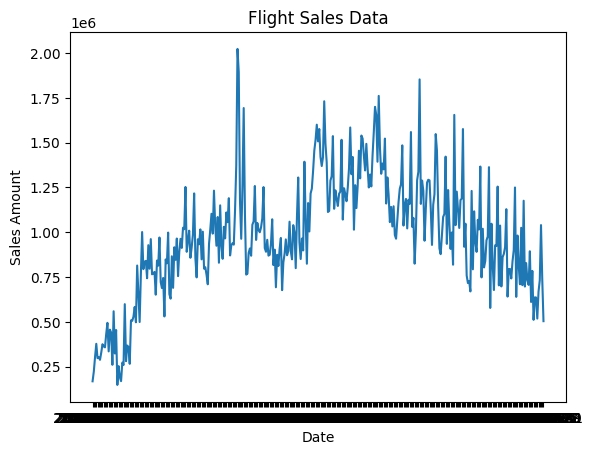

In [3]:
plt.plot(data['航班日期'], data['航线金额'])
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Flight Sales Data')
plt.show()

In [4]:
# 数据准备
window_size = 1
future_steps = 7  # 预测未来7天的销售数据
X = []
y = []
for i in range(len(scaled_sales_amount) - window_size):
    X.append(scaled_sales_amount[i:i+window_size])
    y.append(scaled_sales_amount[i+window_size])

X = np.array(X)
y = np.array(y)

# 打印输入序列和目标序列的形状
print('Input shape:', X.shape)
print('Target shape:', y.shape)

Input shape: (364, 1, 1)
Target shape: (364, 1)


In [5]:
# 定义 LSTM 模型
model = Sequential()
model.add(LSTM(128, input_shape=(window_size, 1), return_sequences=True))
model.add(LSTM(64))
model.add(Dense(1))

# 编译模型
model.compile(loss='mean_squared_error', optimizer='adam')

# 训练模型
model.fit(X, y, epochs=30, batch_size=32)

Epoch 1/30


D:\anaconda\envs\datawym\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2163
Epoch 2/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1470 
Epoch 3/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0712 
Epoch 4/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0210 
Epoch 5/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0206 
Epoch 6/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0189 
Epoch 7/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0167 
Epoch 8/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0145 
Epoch 9/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0153 
Epoch 10/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0176 
Epoch 11/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0151 
Epoch 12/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0164 
Epoch 13/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0144 
Epoch 14/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0142 
Epoch 15/30
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0131 
Epoch 16/30
12/1

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


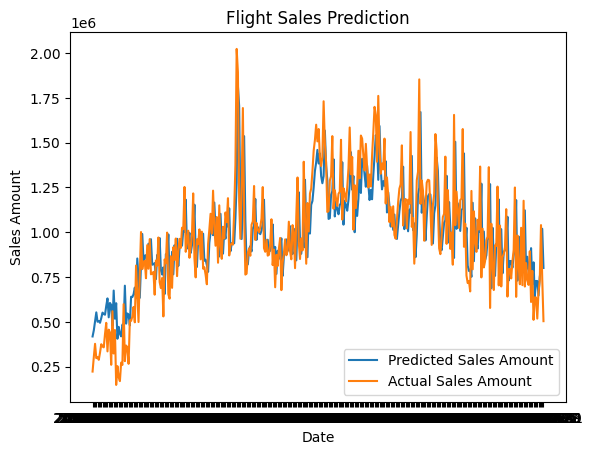

In [6]:
# 预测销售额
predictions = model.predict(X)
# 反归一化
predictions = scaler.inverse_transform(predictions)

# 绘制预测结果
plt.plot(data['航班日期'][window_size:], predictions, label='Predicted Sales Amount')
plt.plot(data['航班日期'][window_size:], data['航线金额'][window_size:], label='Actual Sales Amount')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.title('Flight Sales Prediction')
plt.legend()
plt.show()

In [7]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 反归一化实际销售额
actual_values = scaler.inverse_transform(y)

# 反归一化预测销售额
predicted_values = predictions

# 计算MSE
mse = mean_squared_error(actual_values, predicted_values)

# 计算RMSE
rmse = mean_squared_error(actual_values, predicted_values, squared=False)

# 计算MAE
mae = mean_absolute_error(actual_values, predicted_values)

# 计算R-squared
r2 = r2_score(actual_values, predicted_values)

print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R-squared:", r2)

MSE: 45981049164.968254
RMSE: 214431.9219821719
MAE: 168633.0770638736
R-squared: 0.572844600861483


D:\anaconda\envs\datawym\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
